# Data Augmentation

## Que es ?
  Son una serie de tecnicas destinadas a aumentar la cantidad de datos disponibles para entrenar distintos algoritmos de Machine Learning.

## Por que es util ?
 - Aumentan la cantidad de datos disponibles para entrenar un algoritmo, bien utilizada esta tecnica nos ayuda a:
        - Prevenir el overfitting: Al tener una mayor cantidad de casos de "estudio" para nuestro algoritmo, este va a aprender a diferenciar una mayor cantidad de casos posibles. Pero con la diferencia de que estos nuevos datos pueden ser movificados a nuestro gusto, por ejemplo: Podemos añadir distorsion a un determinado grupo de imagenes o tambien rotarlas.
        - Agilizar la implementacion: Como estas tecnicas son aplicadas sobre datos que ya tenemos clasificados, su nueva permutacion se espera que tenga la misma clasificacion. De esta manera si aplicamos a cada imagen de un grupo de 100 un efecto de distorsion y lo añadimos a nuestro dataset, estamos duplicando el tamaño del set de entrenamiento.

In [1]:
from IPython.display import Image

![title](img/perrito.png)

![title](img/gatito.png)

## Ejemplo: 

Para la prueba vamos a utilizar un dataset muy conocido llamado Minst. El cual contiene miles de digitos del 0 al 9 y el objetivo es obviamente, clasificar las imagenes.

### Implementacion:
 - Keras: Libreria que usamos para crear una red neuronal y ademas utilizar herramientas de pre-procesamiento (usan de fondo TensorFlow)
 - sklearn: Libreria con multiples herramientas para tratar la data a entrenar (ademas posee algorimos de Machine Learning, incluso una version reducida de una red neuronal)
 - Pandas: Libreria que usamos para leer el dataset que tiene formato CSV y pasamos a formato DataFrame para poder trabajarlo.
 - Numpy: Libreria por excelencia para hacer cuentas en Python
 - matPlotLib: Libreria para graficar

In [2]:
import pandas as pd
import numpy as np
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Dense
from keras.utils import np_utils
from matplotlib import pyplot
import pandas as pd
from sklearn.model_selection import train_test_split
from keras.datasets import mnist
from keras.preprocessing.image import ImageDataGenerator
from matplotlib import pyplot
from keras import backend as K

Using TensorFlow backend.


Leemos los datos de los datasets y los guardamos como DataFrames

In [3]:
(X_train, y_train), (X_test, y_test) = mnist.load_data()

Definimos el tamaño que tienen nuestras imagenes
Es un vector de 28*28 = 784 para cada imagen

In [4]:
num_pixels = X_train.shape[1] * X_train.shape[2]
X_train = X_train.reshape((X_train.shape[0], num_pixels)).astype('float32')
X_test = X_test.reshape((X_test.shape[0], num_pixels)).astype('float32')

Normalizamos los datos (que van originalmente de 0 a 255)

In [5]:
X_train = X_train / 255
X_test = X_test / 255

Configuramos los valores de salida, van del 0 al 9 entonces usamos 10 columnas y le ponemos un 1 al valor que corresponda

In [6]:
y_train = np_utils.to_categorical(y_train)
y_test = np_utils.to_categorical(y_test)
num_classes = y_test.shape[1]

Definimos un modelo, es decir las capas que tendra nuestra red neuronal.

In [7]:
def baseline_model():
	model = Sequential()
	model.add(Dense(num_pixels, input_dim=num_pixels, kernel_initializer='normal', activation='relu'))
	model.add(Dense(num_classes, kernel_initializer='normal', activation='softmax'))
	model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
	return model

Llamamos a la funcion que crea el modelo

In [8]:
model = baseline_model()

Entrenamos el modelo con parametros estandar:

In [9]:
model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=10, batch_size=200, verbose=2)

Train on 60000 samples, validate on 10000 samples
Epoch 1/10
 - 5s - loss: 0.2832 - accuracy: 0.9196 - val_loss: 0.1447 - val_accuracy: 0.9564
Epoch 2/10
 - 5s - loss: 0.1111 - accuracy: 0.9678 - val_loss: 0.0942 - val_accuracy: 0.9731
Epoch 3/10
 - 5s - loss: 0.0706 - accuracy: 0.9792 - val_loss: 0.0772 - val_accuracy: 0.9762
Epoch 4/10
 - 6s - loss: 0.0498 - accuracy: 0.9861 - val_loss: 0.0740 - val_accuracy: 0.9777
Epoch 5/10
 - 7s - loss: 0.0358 - accuracy: 0.9900 - val_loss: 0.0666 - val_accuracy: 0.9784
Epoch 6/10
 - 6s - loss: 0.0263 - accuracy: 0.9932 - val_loss: 0.0622 - val_accuracy: 0.9817
Epoch 7/10
 - 6s - loss: 0.0194 - accuracy: 0.9954 - val_loss: 0.0622 - val_accuracy: 0.9800
Epoch 8/10
 - 5s - loss: 0.0146 - accuracy: 0.9966 - val_loss: 0.0616 - val_accuracy: 0.9806
Epoch 9/10
 - 5s - loss: 0.0108 - accuracy: 0.9978 - val_loss: 0.0609 - val_accuracy: 0.9816
Epoch 10/10
 - 6s - loss: 0.0086 - accuracy: 0.9985 - val_loss: 0.0567 - val_accuracy: 0.9829


Evaluamos el resultado:

In [10]:
scores = model.evaluate(X_test, y_test, verbose=0)
print("Baseline Error: %.2f%%" % (100-scores[1]*100))

Baseline Error: 1.71%


In [11]:
X_train_ref, y_train_ref, X_test_ref, y_test_ref = X_train, y_train, X_test, y_test

## Aumentando nuestro Dataset

Vamos a tomar por ejemplo la primera fila de nuestro dataset y vamos a plotearla para ver de que numero se trata:

In [12]:
train_set = pd.read_csv("datasets/train.csv")
test_set = pd.read_csv("datasets/test.csv")

In [13]:
train_info = train_set.loc[:, train_set.columns != 'label']
test_info = test_set.loc[:, test_set.columns != 'label']
train, test = train_test_split(train_set, test_size=0.2)
train_label = train.label
test_label = test.label
train_info = train.loc[:, train.columns != 'label']
test_info = test.loc[:, test.columns != 'label']

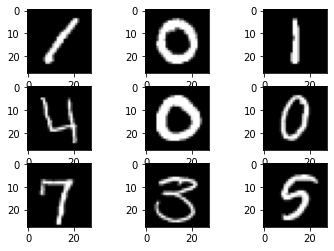

In [14]:
for i in range(0, 9):
    pyplot.subplot(330 + 1 + i)
    train_info = train_set.loc[:, train_set.columns != 'label']
    pyplot.imshow(train_info[i:i+1].values.reshape(28,28), cmap=pyplot.get_cmap('gray'))
pyplot.show()

### ZCA Whitening

/Users/federicocavazzoli/opt/anaconda3/envs/Fede/lib/python3.7/site-packages/keras_preprocessing/image/image_data_generator.py:336: UserWarning: This ImageDataGenerator specifies `zca_whitening`, which overrides setting of `featurewise_center`.
  warnings.warn('This ImageDataGenerator specifies '
/Users/federicocavazzoli/opt/anaconda3/envs/Fede/lib/python3.7/site-packages/keras_preprocessing/image/image_data_generator.py:940: UserWarning: Expected input to be images (as Numpy array) following the data format convention "channels_last" (channels on axis 3), i.e. expected either 1, 3 or 4 channels on axis 3. However, it was passed an array with shape (60000, 1, 28, 28) (28 channels).
  ' channels).')
/Users/federicocavazzoli/opt/anaconda3/envs/Fede/lib/python3.7/site-packages/keras_preprocessing/image/numpy_array_iterator.py:127: UserWarning: NumpyArrayIterator is set to use the data format convention "channels_last" (channels on axis 3), i.e. expected either 1, 3, or 4 channels on axis 

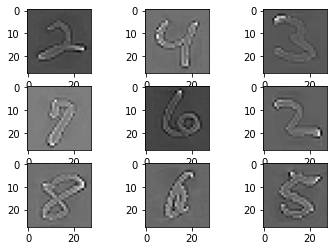

In [15]:
K.image_data_format()
# load data
(X_train, y_train), (X_test, y_test) = mnist.load_data()
# reshape to be [samples][pixels][width][height]
X_train = X_train.reshape(X_train.shape[0], 1, 28, 28)
X_test = X_test.reshape(X_test.shape[0], 1, 28, 28)
# convert from int to float
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')
# define data preparation
datagen = ImageDataGenerator(zca_whitening=True)
# fit parameters from data
datagen.fit(X_train)
# configure batch size and retrieve one batch of images
for X_batch, y_batch in datagen.flow(X_train, y_train, batch_size=9):
	# create a grid of 3x3 images
	for i in range(0, 9):
		pyplot.subplot(330 + 1 + i)
		pyplot.imshow(X_batch[i].reshape(28, 28), cmap=pyplot.get_cmap('gray'))
	# show the plot
	pyplot.show()
	break

In [16]:
num_pixels = 28*28
X_train = X_train.reshape((X_train.shape[0], num_pixels)).astype('float32')
X_test = X_test.reshape((X_test.shape[0], num_pixels)).astype('float32')
y_train = np_utils.to_categorical(y_train)
y_test = np_utils.to_categorical(y_test)
num_classes = y_test.shape[1]

In [17]:
model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=10, batch_size=200, verbose=2)

Train on 60000 samples, validate on 10000 samples
Epoch 1/10
 - 5s - loss: 8.3847 - accuracy: 0.9781 - val_loss: 8.6125 - val_accuracy: 0.9783
Epoch 2/10
 - 5s - loss: 1.8084 - accuracy: 0.9906 - val_loss: 7.8378 - val_accuracy: 0.9780
Epoch 3/10
 - 7s - loss: 0.8670 - accuracy: 0.9940 - val_loss: 6.5753 - val_accuracy: 0.9779
Epoch 4/10
 - 6s - loss: 0.4823 - accuracy: 0.9961 - val_loss: 6.3968 - val_accuracy: 0.9810
Epoch 5/10
 - 6s - loss: 0.4441 - accuracy: 0.9964 - val_loss: 6.4062 - val_accuracy: 0.9814
Epoch 6/10
 - 6s - loss: 0.5466 - accuracy: 0.9961 - val_loss: 7.3675 - val_accuracy: 0.9788
Epoch 7/10
 - 7s - loss: 0.5477 - accuracy: 0.9961 - val_loss: 5.8115 - val_accuracy: 0.9827
Epoch 8/10
 - 8s - loss: 0.4987 - accuracy: 0.9964 - val_loss: 6.8537 - val_accuracy: 0.9803
Epoch 9/10
 - 7s - loss: 0.5643 - accuracy: 0.9957 - val_loss: 6.4705 - val_accuracy: 0.9801
Epoch 10/10
 - 6s - loss: 0.4539 - accuracy: 0.9965 - val_loss: 6.8980 - val_accuracy: 0.9801


In [18]:
scores = model.evaluate(X_test, y_test, verbose=0)
print("Baseline Error: %.2f%%" % (100-scores[1]*100))

Baseline Error: 1.99%


In [19]:
X_train_ZCA, y_train_ZCA, X_test_ZCA, y_test_ZCA = X_train, y_train, X_test, y_test

### Random Shifts

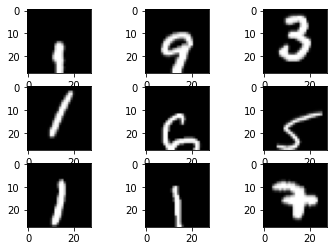

In [20]:
K.image_data_format()
# load data
(X_train, y_train), (X_test, y_test) = mnist.load_data()
# reshape to be [samples][pixels][width][height]
X_train = X_train.reshape(X_train.shape[0], 1, 28, 28)
X_test = X_test.reshape(X_test.shape[0], 1, 28, 28)
# convert from int to float
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')
# define data preparation
shift = 0.4
datagen = ImageDataGenerator(width_shift_range=shift, height_shift_range=shift)
# fit parameters from data
datagen.fit(X_train)
# configure batch size and retrieve one batch of images
for X_batch, y_batch in datagen.flow(X_train, y_train, batch_size=20):
	# create a grid of 3x3 images
	for i in range(0, 9):
		pyplot.subplot(330 + 1 + i)
		pyplot.imshow(X_batch[i].reshape(28, 28), cmap=pyplot.get_cmap('gray'))
	# show the plot
	pyplot.show()
	break

In [21]:
num_pixels = 28*28
X_train = X_train.reshape((X_train.shape[0], num_pixels)).astype('float32')
X_test = X_test.reshape((X_test.shape[0], num_pixels)).astype('float32')
y_train = np_utils.to_categorical(y_train)
y_test = np_utils.to_categorical(y_test)
num_classes = y_test.shape[1]

In [22]:
model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=10, batch_size=200, verbose=2)

Train on 60000 samples, validate on 10000 samples
Epoch 1/10
 - 5s - loss: 0.5014 - accuracy: 0.9962 - val_loss: 7.4049 - val_accuracy: 0.9803
Epoch 2/10
 - 6s - loss: 0.5333 - accuracy: 0.9961 - val_loss: 7.6935 - val_accuracy: 0.9796
Epoch 3/10
 - 6s - loss: 0.4663 - accuracy: 0.9966 - val_loss: 7.6804 - val_accuracy: 0.9803
Epoch 4/10
 - 6s - loss: 0.4264 - accuracy: 0.9966 - val_loss: 6.4728 - val_accuracy: 0.9819
Epoch 5/10
 - 6s - loss: 0.3889 - accuracy: 0.9969 - val_loss: 6.9143 - val_accuracy: 0.9806
Epoch 6/10
 - 6s - loss: 0.3947 - accuracy: 0.9966 - val_loss: 7.4045 - val_accuracy: 0.9817
Epoch 7/10
 - 7s - loss: 0.4841 - accuracy: 0.9963 - val_loss: 7.4917 - val_accuracy: 0.9801
Epoch 8/10
 - 7s - loss: 0.5661 - accuracy: 0.9958 - val_loss: 7.3183 - val_accuracy: 0.9813
Epoch 9/10
 - 7s - loss: 0.3582 - accuracy: 0.9974 - val_loss: 6.8741 - val_accuracy: 0.9827
Epoch 10/10
 - 7s - loss: 0.2682 - accuracy: 0.9976 - val_loss: 7.4084 - val_accuracy: 0.9798


In [23]:
scores = model.evaluate(X_test, y_test, verbose=0)
print("Baseline Error: %.2f%%" % (100-scores[1]*100))

Baseline Error: 2.02%


## Juntando todo
![title](img/numeritos.png)

In [24]:
X_train_shift, y_train_shift, X_test_shift, y_test_shift = X_train, y_train, X_test, y_test

In [25]:
X_train_FINAL = np.concatenate((X_train_ref,X_train_shift, X_train_ZCA),axis=0)

In [26]:
y_train_FINAL = np.concatenate((y_train_ref, y_train_shift, y_train_ZCA),axis=0)

In [27]:
X_test_FINAL = np.concatenate((X_test_ref , X_test_shift , X_test_ZCA),axis=0)

In [28]:
y_test_FINAL = np.concatenate((y_test_ref , y_test_shift , y_test_ZCA),axis=0)

In [29]:
X = np.concatenate((X_train_FINAL,X_test_FINAL),axis=0)

In [30]:
y = np.concatenate((y_train_FINAL, y_test_FINAL),axis=0)

In [31]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42)

In [32]:
model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=10, batch_size=200, verbose=2)

Train on 168000 samples, validate on 42000 samples
Epoch 1/10
 - 19s - loss: 0.8174 - accuracy: 0.9942 - val_loss: 0.8774 - val_accuracy: 0.9927
Epoch 2/10
 - 19s - loss: 0.4309 - accuracy: 0.9956 - val_loss: 0.4263 - val_accuracy: 0.9956
Epoch 3/10
 - 19s - loss: 0.4344 - accuracy: 0.9955 - val_loss: 0.6814 - val_accuracy: 0.9932
Epoch 4/10
 - 19s - loss: 0.3473 - accuracy: 0.9960 - val_loss: 0.9575 - val_accuracy: 0.9935
Epoch 5/10
 - 19s - loss: 0.3357 - accuracy: 0.9963 - val_loss: 0.8426 - val_accuracy: 0.9937
Epoch 6/10
 - 22s - loss: 0.3267 - accuracy: 0.9962 - val_loss: 1.0788 - val_accuracy: 0.9924
Epoch 7/10
 - 21s - loss: 0.3756 - accuracy: 0.9961 - val_loss: 0.7302 - val_accuracy: 0.9941
Epoch 8/10
 - 19s - loss: 0.2937 - accuracy: 0.9965 - val_loss: 0.5002 - val_accuracy: 0.9953
Epoch 9/10
 - 19s - loss: 0.2922 - accuracy: 0.9965 - val_loss: 0.8721 - val_accuracy: 0.9945
Epoch 10/10
 - 19s - loss: 0.3699 - accuracy: 0.9963 - val_loss: 0.4800 - val_accuracy: 0.9960


In [33]:
scores = model.evaluate(X_test, y_test, verbose=0)
print("Baseline Error: %.2f%%" % (100-scores[1]*100))

Baseline Error: 0.40%


![title](img/rick.png)


In [117]:
test_set = pd.read_csv("datasets/test.csv")

In [118]:
pred = model.predict(test_set)

In [119]:
import numpy as np
import keras

In [120]:
np.argmax(pred, axis=1)

array([2, 0, 9, ..., 3, 9, 2])

In [121]:
pred.shape

(28000, 10)

In [122]:
predictions = np.argmax(pred, axis=1)

In [123]:
predictions.shape

(28000,)

In [124]:
test_set['Label'] = predictions
test_set

,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,Label
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,2
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,9
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
27995,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,9
27996,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,7
27997,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,3
27998,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,9


In [125]:
a.index = np.arange(1, len(a) + 1)

a = test_set['Label'].rename_axis('ImageId')
a

ImageId
0        2
1        0
2        9
3        0
4        3
        ..
27995    9
27996    7
27997    3
27998    9
27999    2
Name: Label, Length: 28000, dtype: int64

In [130]:
a.to_frame

<bound method Series.to_frame of ImageId
0        2
1        0
2        9
3        0
4        3
        ..
27995    9
27996    7
27997    3
27998    9
27999    2
Name: Label, Length: 28000, dtype: int64>

In [133]:
a.index = np.arange(1, len(a) + 1)

In [135]:
a = a.rename_axis('ImageId')


In [136]:
a.to_csv("submit.csv")